# Gradient descent Model for a linear least squares model

We will find the parameters in a linear least squares model using a gradient descent method

In practice, we have an analytics solution to the least squares model, we are looking at this approach to simply see how gradient descent works

Here is the set up for this exercise

We want a data set with a known solution to work with

generate n random x values between 0 and 10

generate y= m*x+b+error

      where m and b are chosen and error is a random normal variable with mean=0 and std=sigma

In [ ]:
import numpy as np

n=50

x=np.random.uniform(0,10,n)

m=3
b=-2
sigma=0.5

y= m*x + b+np.random.normal(0,sigma,n)

Plot y vs x,  you can mess with n, m, b and sigma to change the data as desired

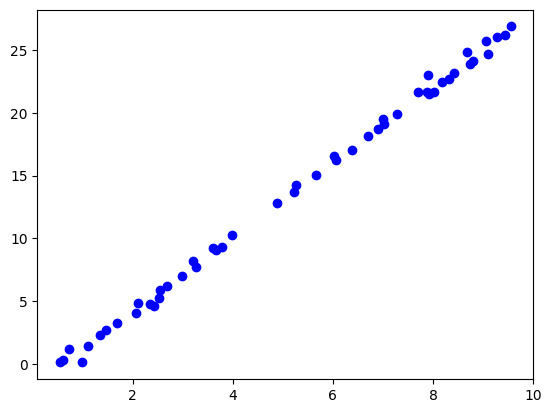

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(x,y,"bo")

Compute the means of x, y, x*y and x^2,  since we use these over and over in the calculations

In [11]:
ybar=sum(y)/n
xbar=sum(x)/n
x2bar=sum(np.square(x))/n
xybar=sum(x*y)/n

Since we have the derived equations for m and b for a linear least squares model, we can compute the algebraic solutions
to compare with the solutions we get by gradient descent

In [12]:
m=(xybar-xbar*ybar)/(x2bar-xbar*xbar)
print(m)

2.9897936301281374


In [13]:
b=ybar-m*xbar
print(b)

-1.8144944165378671


# Here is gradient descent-  

Complete the code below, so that this runs

Now use gradient descent method

a.) pick the initial guess at m and b,  call them mg, bg

b.) set the tolerance and the delta values   (control parameters in the algorithm)

c.) compute an initial L

d.) compute the derivatives and update mg and bg

e.) compute the next L

f.) Start a while loop,  while abs(initial L - next L) <tolerance
                                                                  
    1.) set initial L to next L
    2.) find the derivatives and update mg, and bg
    3.) compute the next L

g.) Once a-f are working, alter my code to add a count of the number of steps needed to converge
                                                          
h.) Try altering the values of tol and delta slightly to see what happens                                                            
                                                                  
                                                                  

In [15]:
#initial m and b,  called mg and bg for gradient
mg=0
bg=0

# descent control parameters
#tol is compared to the change in L,  the descent stops when the change
# in L is below the tolerance
# delta is the step size in the descent
tol= 1e-5
delta=1e-4 #the step at which we are moving

# compute the initial objective function the sum of squares
#  see the lecture notes for this week

L_now= sum((y-mg*x-bg)**2)  # fill in the equation for L_now here
print(L_now)


# compute the derivatives,  using xbar, ybar, xybar, x2bar,n and the
# current value of mg and bg
#   (these do appear in the lecture notes for this week)

dLdb=  2* sum(y-mg*x-bg) # fill in the equation for the derivative of L with respect to b
dLdm=  2* sum((y-mg*x-bg)*x)# fill in the equation for the derivative of L with respect to b

#update the mg and bg values

bg=bg-dLdb*delta
mg=mg-dLdm*delta

# compute the update objective function L,   calling it Lnext


L_next= sum((y-mg*x-bg)**2) # fill in the equation for L_now here
print("Starting objective function value")
print(L_next)

# now use a while loop.   repeat the loop while the absolute value, np.abs(L_now-L_next) is less
# thah the tolerance level.  When this value falls below the tolerance, we must be close to the minima
# stop the loop and print the results

while( np.abs(L_now-L_next)>tol):
    L_now=L_next
    dLdb=  2* sum(y-mg*x-bg) # fill in the equation for the derivative of L with respect to b
    dLdm=  2* sum((y-mg*x-bg)*x) # fill in the equation for the derivative of L with respect to b

    bg=bg+dLdb*delta
    mg=mg+dLdm*delta

    L_next= sum((y-mg*x-bg)**2) # fill in the equation for L_now here
    print(L_next)


print("\n\n")
print("Estimates of the slope and intercept")
print(mg)
print(bg)

13270.222288422356
Starting objective function value
24636.40109168316
10001.374976536341
4083.065016378186
1689.6458125504498
721.6325020544357
330.0295271134498
171.51768883512605
107.26460710916659
81.12885291586343
70.40779507503919
65.92087691339931
63.95563603976562
63.01081332046477
62.479322187608986
62.11566408838293
61.82056045642103
61.553861586628734
61.299328482599776
61.05039124161488
60.8043899905123
60.560246019178976
60.317520026939
60.076031293531166
59.835703678339165
59.59650334506488
59.35841357859255
59.121424601297335
58.885529454871275
58.650722334940184
58.41699791754795
58.18435108673447
57.952776824309595
57.722270165216884
57.49282617942058
57.264439964518644
57.03710664269358
56.810821359417446
56.58557928286675
56.36137560362466
56.13820553449928
55.916064310389984
55.694947188172414
55.47484944659235
55.25576638616249
55.037693329061526
54.82062561903363
54.60455862128912
54.3894877224055
54.175408330228606
53.96231587377494
53.75020580313369
53.539073589

2